# Task 2.: Eigenvalues -- Generation

## Task description

- Create a function, which calculates the eigenvalues of a random but strictly **symmetric** matrix!
- Name the function as `random_eigvals`. It should require two input parameters:
  - The first one named `dim`, which is an integer, and which equals to the size of the random matrices generated in the function.
  - The second parameter nameed as `dist`, which controls the behaviour of the number generation algorithm. If the value of `dist` is the `"normal"` string, then the random numbers in the matrix should be generated from the normal distribution using NumPy's [`randn`](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html) function. Otherwise, random numbers are drawn from the uniform distribution in the interval [0,1] using the [`rand`](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.rand.html#numpy.random.rand) function. 
  - Make sure that in all cases the diagonal and off-diagonal elements are from the same distribution!
- The function `random_eigvals` should return a NumPy `array` with the eigenvalues of the random matrix inside. To calculate the eigenvalues we can use NumPy's [`eigvalsh`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvalsh.html) function.
- Using the function `random_eigvals` calculate the eigenvalues of $50000$ matrices with normally, and $50000$ matrices with uniformly distributed elements. The matrices should be $10 \times 10$ in size.
- Plot the distribution of eigenvalues in both cases (so the distribution of $50000 \times 10$ numbers in both cases) on two histograms. The histogram should consist of at least 500 bins! 
- Describe in your own words what differences or similarities we can observe between the distributions of the eigenvalues of the two random matrices!

## Theoretical background

A square matrix $A$ is called symmetric if and only if it equals to its transpose:

$$
A = A^{T}
$$

There are numerous mathematical theorems, which addresses the problem of the eigenvalues of (symmetric) random matrices. Apparently understanding this concept is useful in quantum mechanics, which for example was discussed by J. Wigner in his famous article in 1955, where he developed the semicircle law for the distribution of eigenvalues of symmetric random matrices [1]. The distribution of the eigenvalues of a matrix with elements chosen from a Gaussian ensemble could be derived and discussed straightforwardly using the semicircle law, and the result is that the eigenvalues follow approximately the distribution called "Wigner's surmise" [2,4,5,6].

In contrast the eigenvalues of a matrix with uniformly distributed elements was described later in 1981 by Z. Füredi and J. Komlós. In one of their theorem they states that the largest eigenvalue  [3]. As stated in their article, the largest eigenvalue of such a matrix always converges to $n/2$, where $n$ is the size of the square random matrix. All other eigenvalues will obey Wigner's semicircle law and will be distributed around zero.

#### Sources
[1] : Wigner, E. P. Characteristic vectors of bordered matrices with infinite dimensions. In The Collected Works of Eugene Paul Wigner (pp. 524-540). Springer, Berlin, Heidelberg. (1993). URL : https://documents.epfl.ch/groups/i/ip/ipg/www/2011-2012/Random_Matrices_and_Communication_Systems/wigner1.pdf  
[2] : Wilks, S. S. Mathematical statistics. Princeton University Press. Princeton, New Jersey. (1947).  
[3] : Füredi, Zoltán, and János Komlós. The eigenvalues of random symmetric matrices. Combinatorica 1.3. 233-241 (1981). URL : https://faculty.math.illinois.edu/~z-furedi/PUBS/furedi_komlos_cca1981_random_eig.pdf  
[4] : Forrester, P. J., & Nagao, T. Eigenvalue statistics of the real Ginibre ensemble. Physical review letters, 99(5), 050603. (2007). URL : https://arxiv.org/abs/0706.2020  
[5] : Simm, N. J. Central limit theorems for the real eigenvalues of large Gaussian random matrices. Random Matrices: Theory and Applications, 6(01), 1750002. (2017). URL : https://arxiv.org/abs/1512.01449  
[6] : Liu, Y. Statistical behavior of the eigenvalues of random matrices. (2000). URL : http://web.math.princeton.edu/mathlab/projects/ranmatrices/yl/randmtx.PDF

## Solving the task

In [1]:
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Just some matplotlib and seaborn parameter tuning

In [2]:
# Set axtick dimensions
major_size = 6
major_width = 1.2
minor_size = 3
minor_width = 1
mpl.rcParams['xtick.major.size'] = major_size
mpl.rcParams['xtick.major.width'] = major_width
mpl.rcParams['xtick.minor.size'] = minor_size
mpl.rcParams['xtick.minor.width'] = minor_width
mpl.rcParams['ytick.major.size'] = major_size
mpl.rcParams['ytick.major.width'] = major_width
mpl.rcParams['ytick.minor.size'] = minor_size
mpl.rcParams['ytick.minor.width'] = minor_width

mpl.rcParams.update({'figure.autolayout': False})

# Seaborn style settings
sns.set_style({'axes.axisbelow': True,
               'axes.edgecolor': '.8',
               'axes.facecolor': 'white',
               'axes.grid': True,
               'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               'figure.facecolor': 'white',
               'font.family': ['sans-serif'],
               'font.sans-serif': ['Arial',
                'DejaVu Sans',
                'Liberation Sans',
                'Bitstream Vera Sans',
                'sans-serif'],
               'grid.color': '.8',
               'grid.linestyle': '--',
               'image.cmap': 'rocket',
               'lines.solid_capstyle': 'round',
               'patch.edgecolor': 'w',
               'patch.force_edgecolor': True,
               'text.color': '.15',
               'xtick.bottom': True,
               'xtick.color': '.15',
               'xtick.direction': 'in',
               'xtick.top': True,
               'ytick.color': '.15',
               'ytick.direction': 'in',
               'ytick.left': True,
               'ytick.right': True})

### Hyperparameters

In [3]:
dim = 10

### Generate matrices

In [4]:
def mat_gen(dim, dist=""):
    
    assert type(dim) == int, "The parameter `dim` should be an integer!"
    assert dim > 1, "The parameter `dim` should be greater, than 1!"
    
    # Set 
    if dist.lower() == 'normal':
        f = np.random.randn
    else:
        f = np.random.rand
    
    # Generate symmetric matrix by symmetrization
    A = f(dim, dim)
    A = (A + A.T)/2
    
    # Generate symmetric matrix by setting corresponding
    # off-diagonal elements equal to each other on both
    # sides of the diagonal
    B = np.zeros((dim, dim))
    for i in range(dim):
        for j in range(i, dim):
            num = f()            
            B[i][j] = num
            if i != j:
                B[j][i] = num
    
    return A, B

In [5]:
def random_eigvals(A):
    
    # Eigenvalues of a symmetric or Hermitian matrix
    return np.linalg.eigvalsh(A)

In [6]:
A, B = mat_gen(dim)

### Check symmetricity and distribution of elements of the generated matrices

#### Symmetricity

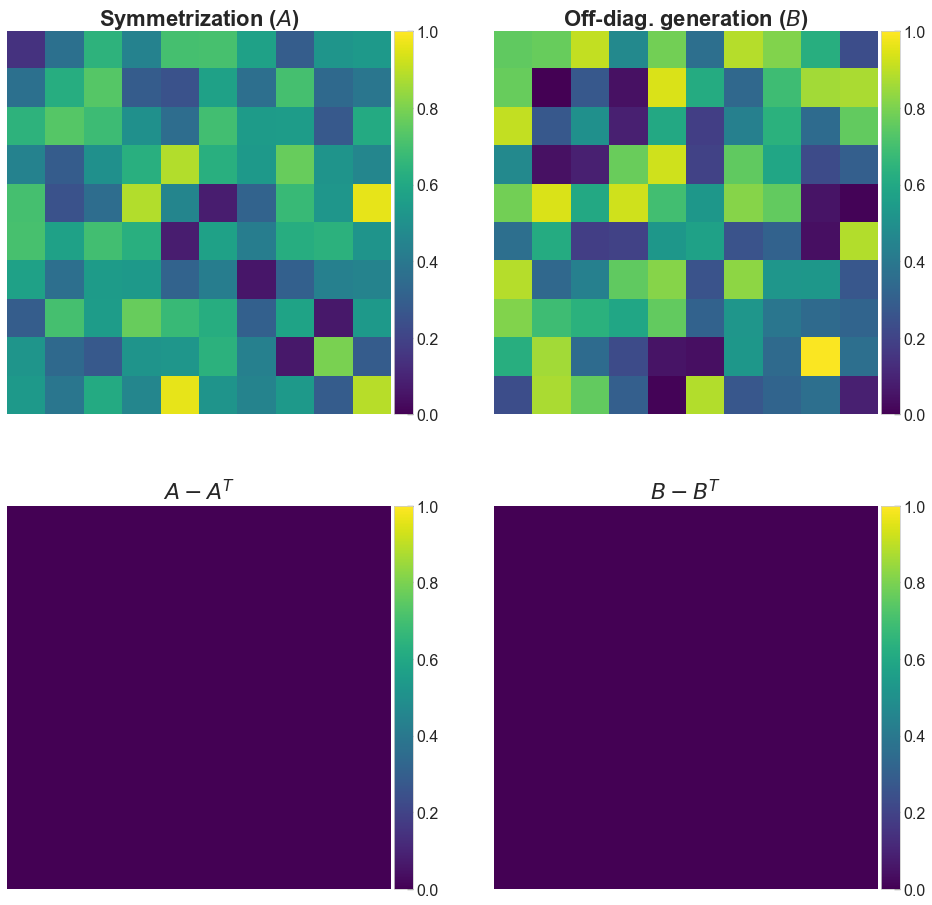

In [7]:
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*8, nrows*8))

axistitlesize = 22
axiscbarsize = 16

mat = [A, B]
title_0 = [
    'Symmetrization ($A$)',
    'Off-diag. generation ($B$)'
]
title_1 = [
    '$A - A^{T}$',
    '$B - B^{T}$',
]

for i in range(ncols):
    ax = axes[0][i]
    ax.axis('off')
    
    im = ax.imshow(mat[i], cmap='viridis', vmin=0, vmax=1)
    
    ax.set_title(title_0[i], fontsize=axistitlesize, fontweight='bold')
    
    # Define colorbar axis
    # Nice fit parameters from stackoverflow:
    # https://stackoverflow.com/questions/23876588/matplotlib-colorbar-in-each-subplot
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax)
    cbar.ax.tick_params(labelsize=axiscbarsize)

for i in range(ncols):
    ax = axes[1][i]
    ax.axis('off')
    
    im = ax.imshow(mat[i] - mat[i].T, cmap='viridis', vmin=0, vmax=1)
    
    ax.set_title(title_1[i], fontsize=axistitlesize, fontweight='bold')
    
    # Define colorbar axis
    # Nice fit parameters from stackoverflow:
    # https://stackoverflow.com/questions/23876588/matplotlib-colorbar-in-each-subplot
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im, cax)
    cbar.ax.tick_params(labelsize=axiscbarsize)

plt.show()

The images in the bottom row indicates, that both of the generated matrices are symmetric.

#### Distribution of elements

In [8]:
# Generate some matrices and extract diagonal and off-diagonal elements
diags_A = []
offdiags_A = []
diags_B = []
offdiags_B = []

# Boolean mask to extract elements from
# diagonals and off-diagonals
M = np.eye(dim, dtype=bool)

N = 100
for i in range(N):
    A, B = mat_gen(dim, dist='')
    
    # Extract diagonals and off-diagonal elements
    # using the boolean mask defined above
    diags_A.append(A[M])
    offdiags_A.append(A[~M])
    diags_B.append(B[M])
    offdiags_B.append(B[~M])

# Concatenate all extracted entries inside the corresponding lists
diags_A = np.concatenate(diags_A)
offdiags_A = np.concatenate(offdiags_A)
diags_B = np.concatenate(diags_B)
offdiags_B = np.concatenate(offdiags_B)

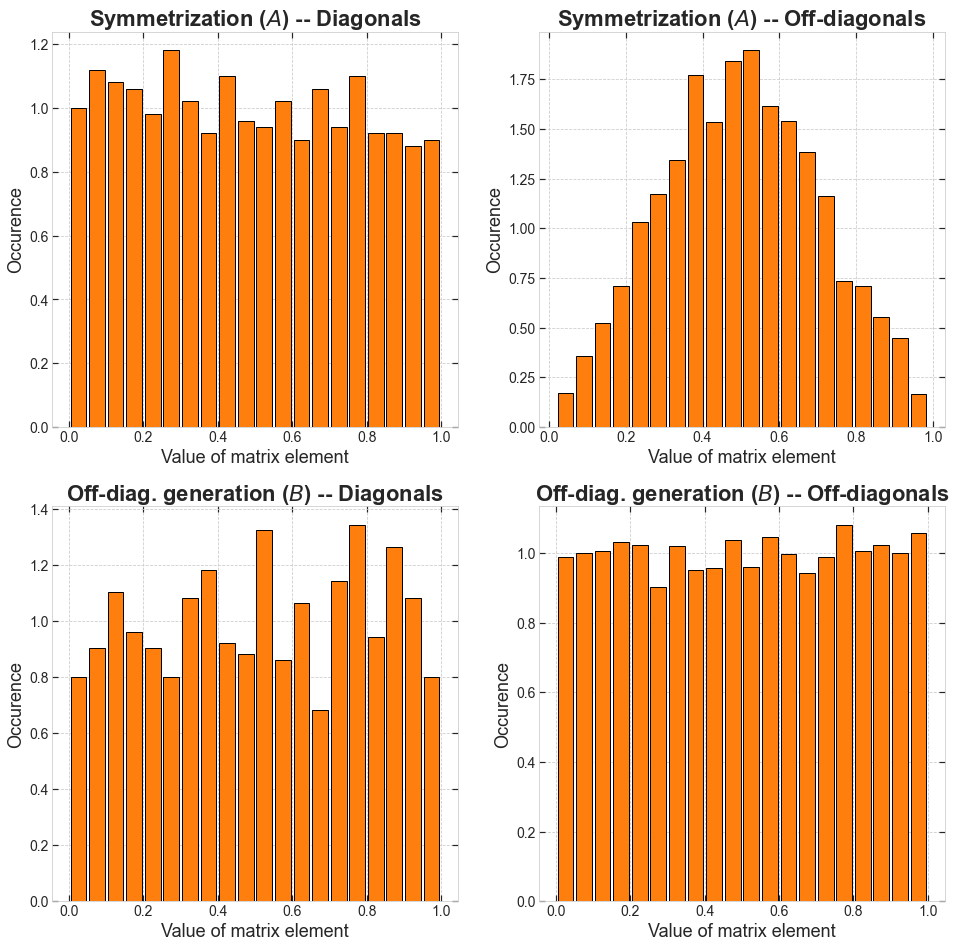

In [9]:
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*8, nrows*8))

axistitlesize = 22
axislabelsize = 18
axisticksize = 14

mat_diag = [diags_A, diags_B]
mat_offdiag = [offdiags_A, offdiags_B]
title = [
    'Symmetrization ($A$)',
    'Off-diag. generation ($B$)'
]
subtitle = [
    ' -- Diagonals',
    ' -- Off-diagonals'
]

for i in range(nrows):
    
    # Histogram hyperparameters
    n_bins = 20
    w_bars = 0.85
    
    # DIAGONALS
    # Bin diagonal elements
    hist, bins = np.histogram(mat_diag[i], bins=n_bins, density=True)
    width = w_bars * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    # Plot corresponding histogram
    axes[i][0].bar(center, hist, align='center', width=width,
                   color='tab:orange', edgecolor='black')
    
    # OFF-DIAGONALS
    # Bin off-diagonal elements
    hist, bins = np.histogram(mat_offdiag[i], bins=n_bins, density=True)
    width = w_bars * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    # Plot corresponding histogram
    axes[i][1].bar(center, hist, align='center', width=width,
                   color='tab:orange', edgecolor='black')
    
    for j in range(ncols):
        axes[i][j].set_title(title[i] + subtitle[j], fontsize=axistitlesize, fontweight='bold')
        axes[i][j].set_xlabel('Value of matrix element', fontsize=axislabelsize)
        axes[i][j].set_ylabel('Occurence', fontsize=axislabelsize)
        axes[i][j].tick_params(axis='both', which='major', labelsize=axisticksize)
    
    
plt.show()

This analysis clearly shows, that symmetrizing a random matrix with the

$$
S_{A} = \frac{\left( A + A^{T} \right)}{2}
$$

formula, the distribution of the values in the off-diagonal of the matrix changes and thus won't match with the distribution of the elements in the diagonal. In contrast, simply generating both the diagonal and off-diagonal elements using the same distribution results in a similarly distributed set of diagonal and off-diagonal elements. This mean we need to use the matrix denoted by $B$ to satisfy the given constraints of the task.

### Distribution of eigenvalues

In [10]:
# Generate random symmetric matrices and calculate their eigenvalues
eig_normal = []
eig_uniform = []

N = 50000
for i in range(N):
    _, B = mat_gen(dim, dist='normal')
    eig_normal.append(random_eigvals(B))
    
    _, B = mat_gen(dim, dist='uniform')
    eig_uniform.append(random_eigvals(B))
    
# Concatenate all eigenvalues inside the corresponding lists
eig_normal = np.concatenate(eig_normal)
eig_uniform = np.concatenate(eig_uniform)

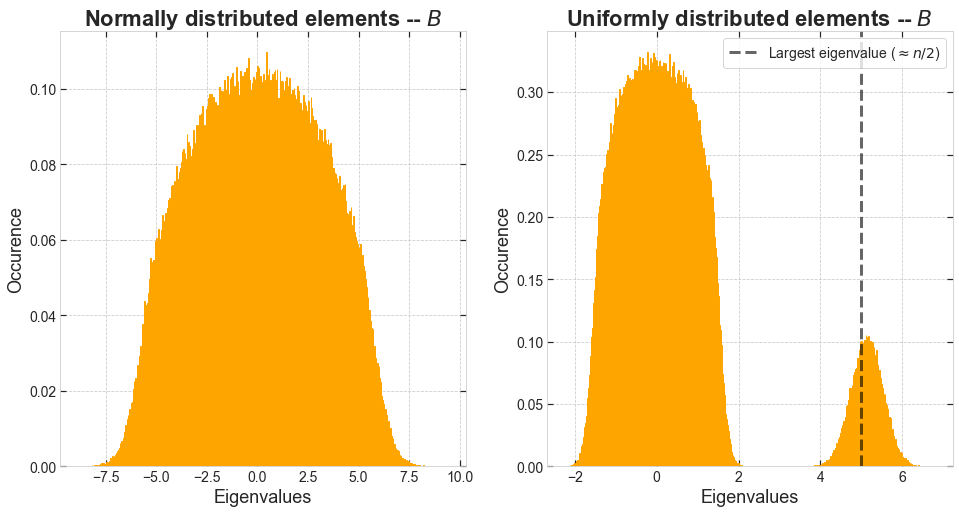

In [11]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*8, nrows*8))

axistitlesize = 22
axislabelsize = 18
axisticksize = 14
axislegendsize = 14

eig = [eig_normal, eig_uniform]
title = [
    'Normally distributed elements -- $B$',
    'Uniformly distributed elements -- $B$'
]

for i in range(ncols):
    
    # Histogram hyperparameters
    n_bins = 500
    w_bars = 1
    
    # Plot distribution of eigenvalues
    hist, bins = np.histogram(eig[i], bins=n_bins, density=True)
    width = w_bars * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    # Plot corresponding histogram
    axes[i].bar(center, hist, align='center', width=width,
                color='tab:orange', edgecolor='orange')
    
    # Plot the n/2 bar on the uniform plot
    if i == 1:
        axes[i].axvline(dim/2, label='Largest eigenvalue ($\\approx n/2$)',
                         c='black', ls='--', lw=3, alpha=0.6)
        axes[i].legend(fontsize=axislegendsize)
    
    axes[i].set_title(title[i], fontsize=axistitlesize, fontweight='bold')
    axes[i].set_xlabel('Eigenvalues', fontsize=axislabelsize)
    axes[i].set_ylabel('Occurence', fontsize=axislabelsize)
    axes[i].tick_params(axis='both', which='major', labelsize=axisticksize)
    
plt.show()

*Technical note:  
Matplotlib can't render a histogram/barplot with lots of bins/bars, but somewhat it still renders the edges of bins/bars. Here I'm using the `edgecolor` argument to make the plot visible in an arbitrary color.*

The eigenvalues of a symmetric random matrix with normally distributed elements in the interval $\left[ 0, 1 \right]$ are distributed around zero, which coincides with the theoretical expectations. According to Wigner, the distribution of the eigenvalues show an asymptotic behaviour for random matrices, which is especially the Wigner's surmise distribution for matrices with normally distributed elements. On the left plot no clear asymptotic behavior could be observed, but it still resembles to the theoretically expected image.

On the right plot the eigenvalues distributed around zero, and around approximately $n/2$, which observation also coincides with the Füredi-Komlós theorem in the case of uniformly distributed matrix elements.

In summary, we can state that all the observations coincided with the theoretical expectations, which indicates that the correct solution were given for this task.

### Test of the matrices denoted by $A$

Let us generate matrices with the symmetrization formula. The distribution of the diagonals and off-diagonals are not the same in this case as it was clearly shown above. However this discrepancy does not seem to affect the characteristics of the eigenvalue distribution, as shown on the histogram below.

In [12]:
# Generate random symmetric matrices and calculate their eigenvalues
eig_normal = []
eig_uniform = []

N = 50000
for i in range(N):
    A, _ = mat_gen(dim, dist='normal')
    eig_normal.append(random_eigvals(A))
    
    A, _ = mat_gen(dim, dist='uniform')
    eig_uniform.append(random_eigvals(A))
    
# Concatenate all eigenvalues inside the corresponding lists
eig_normal = np.concatenate(eig_normal)
eig_uniform = np.concatenate(eig_uniform)

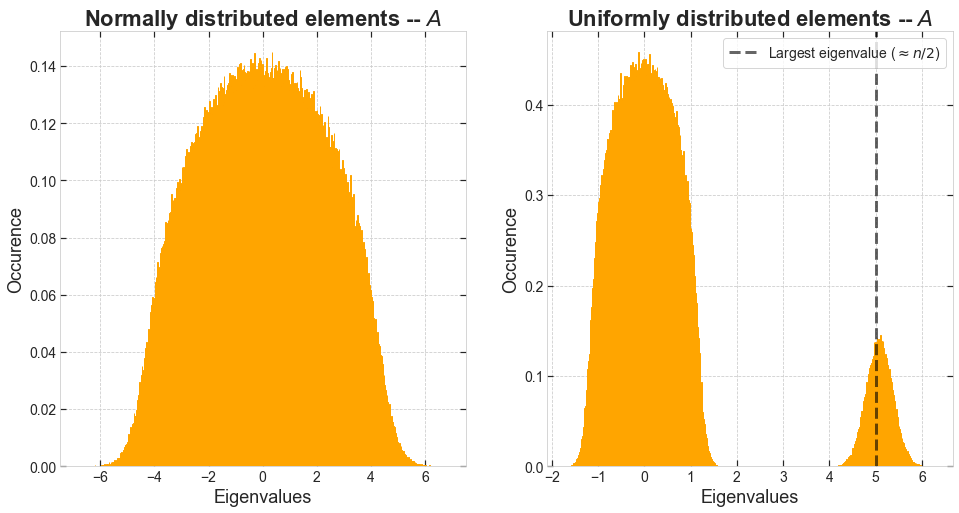

In [13]:
nrows = 1
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*8, nrows*8))

axistitlesize = 22
axislabelsize = 18
axisticksize = 14
axislegendsize = 14

eig = [eig_normal, eig_uniform]
title = [
    'Normally distributed elements -- $A$',
    'Uniformly distributed elements -- $A$'
]

for i in range(ncols):
    
    # Histogram hyperparameters
    n_bins = 500
    w_bars = 1
    
    # Plot distribution of eigenvalues
    hist, bins = np.histogram(eig[i], bins=n_bins, density=True)
    width = w_bars * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    # Plot corresponding histogram
    axes[i].bar(center, hist, align='center', width=width,
                color='tab:orange', edgecolor='orange')
    
    # Plot the n/2 bar on the uniform plot
    if i == 1:
        axes[i].axvline(dim/2, label='Largest eigenvalue ($\\approx n/2$)',
                         c='black', ls='--', lw=3, alpha=0.6)
        axes[i].legend(fontsize=axislegendsize)
    
    axes[i].set_title(title[i], fontsize=axistitlesize, fontweight='bold')
    axes[i].set_xlabel('Eigenvalues', fontsize=axislabelsize)
    axes[i].set_ylabel('Occurence', fontsize=axislabelsize)
    axes[i].tick_params(axis='both', which='major', labelsize=axisticksize)
    
plt.show()